In [1]:
from espei.datasets import load_datasets
from espei.error_functions.context import setup_context
from espei.error_functions.zpf_error import calculate_zpf_error
from pycalphad import Database
from glob import glob
import numpy as np

#ds = load_datasets(glob('UQ/Cr-Ni-run/run/ZPF/*.json'))
ds = load_datasets(['UQ/Cr-Ni-run/run/ZPF/CR-NI-ZPF-BCC_A2-FCC_A1-zhang2014impurity.json'])
dbf = Database('UQ/Cr-Ni-run/crawl.tdb')
dbf.elements = ['CR', 'NI', 'VA'] # workaround issue with callables of subsystem
ctx = setup_context(dbf, ds)
# shape: chain, sample, param_symbol
param_trace = np.load('UQ/Cr-Ni-run/trace.npy')
lnprob = np.load('UQ/Cr-Ni-Run/lnprob.npy')

In [10]:
chain_idx = 0
zpf_errors = []
zpf_error_gradients = []
parameter_trials = []
parameters = np.array(param_trace[chain_idx, 0, :])
for iter_idx in range(100):
    zpf_prob_error, zpf_prob_error_gradient = calculate_zpf_error(parameters=dict(zip(ctx['symbols_to_fit'], parameters)),
                                                                  **ctx.get('zpf_kwargs'))
    zpf_errors.append(float(zpf_prob_error))
    if np.isfinite(zpf_error):
        zpf_error_gradients.append(np.array(zpf_prob_error_gradient))
    else:
        zpf_error_gradients.append(np.full(zpf_prob_error_gradient.shape, np.inf))
    parameter_trials.append(np.array(parameters))
    # probability maximization, so we are trying to maximize (gradient ascent)
    parameters = parameters + np.array(zpf_prob_error_gradient)
    print(f'{iter_idx}/100')

0/100
1/100
2/100
3/100
4/100
5/100
6/100
7/100
8/100
9/100
10/100
11/100
12/100
13/100
14/100
15/100
16/100
17/100
18/100
19/100
20/100
21/100
22/100
23/100
24/100
25/100
26/100
27/100
28/100
29/100
30/100
31/100
32/100
33/100
34/100
35/100
36/100
37/100
38/100
39/100
40/100
41/100
42/100
43/100
44/100
45/100
46/100
47/100
48/100
49/100
50/100
51/100
52/100
53/100
54/100
55/100
56/100
57/100
58/100
59/100
60/100
61/100
62/100
63/100
64/100
65/100
66/100
67/100
68/100
69/100
70/100
71/100
72/100
73/100
74/100
75/100
76/100
77/100
78/100
79/100
80/100
81/100
82/100
83/100
84/100
85/100
86/100
87/100
88/100
89/100
90/100
91/100
92/100
93/100
94/100
95/100
96/100
97/100
98/100
99/100


Text(0.5, 1.0, 'Cr-Ni Trial 99')

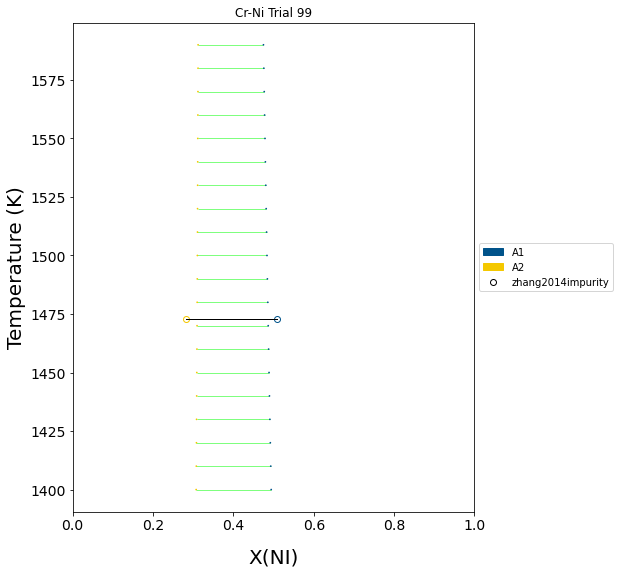

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
from espei.plot import dataplot
from pycalphad import variables as v
from pycalphad import binplot

fig = plt.figure(figsize=(9,9))
ax = fig.gca()
trial = 99
binplot(dbf, ['CR', 'NI', 'VA'], ['A1','A2'], {v.P: 101325, v.T: (1400, 1600, 10), v.X('NI'): (0,1,0.1), v.N:1},
        plot_kwargs={'ax': ax},
        eq_kwargs={'parameters': dict(zip(ctx['symbols_to_fit'], parameter_trials[trial]))})
dataplot(['CR', 'NI', 'VA'], ['A1', 'A2'], {v.P: 101325, v.T: (1,1,1), v.X('NI'): (1, 1, 1)}, ds, ax=ax)
ax.set_title(f'Cr-Ni Trial {trial}')

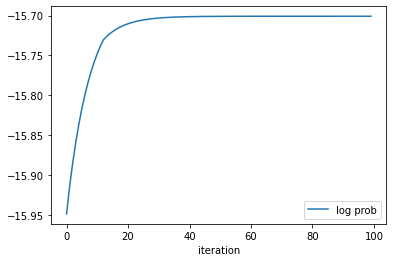

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
#ipopt_zpf_errors = np.load('UQ/Cr-Ni-run/2020-05-24-zpf-errors.npy')
#plt.plot(np.arange(100), np.log(np.linalg.norm(zpf_error_gradients, axis=-1)), label='gradient norm')
#plt.plot(np.arange(100), np.log(np.abs(ipopt_zpf_errors)), label='ipopt errors')
plt.plot(np.arange(100), np.array(zpf_errors), label='log prob')
plt.xlabel('iteration')
#plt.plot(np.arange(500), -lnprob[0,:500], label='lnprob')
plt.legend()